# Test VAE on Genotypes
The training of this test, I will generate causal scenarios up front, and then I will train vaes at a series of depths and size of latent variables, from there I will see the effect of these parameters on the ability to use latent codes in causal inference.

In [1]:
import cit 
import vae
import data_model as dm
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
# Define model parameters
depths = [1,2,3] # number of hidden layers
latent = [1,2,3,4,5] # number of latent variables
# Define Data
num_trials = 10
num_genotypes = 200
num_subjects = 500
null_data = [dm.generate_null(n=num_subjects, p=num_genotypes) for i in range(num_trials)]
caus1_data = [dm.generate_caus1(n=num_subjects, p=num_genotypes) for i in range(num_trials)]
ind1_data = [dm.generate_ind1(n=num_subjects, p=num_genotypes) for i in range(num_trials)]

## Null data Training
Now we can start training some VAEs on our null datasets and evaluate the behavior on different parameters:

In [60]:

# Training VAEs
from itertools import product
models_null = [
    [
        vae.VAE(*params)
        for params in 
        product([num_genotypes],latent,depths)
    ] for i in range(num_trials)
]
models_null[2].compile(loss = models_null[2].total_loss, optimizer=tf.train.AdamOptimizer(1e-4))
%time test = models_null[2].fit(null_data[0][2] / 2.,null_data[0][2] / 2., epochs=100, batch_size=10, verbose=0)

CPU times: user 1min 41s, sys: 1.54 s, total: 1min 43s
Wall time: 1min 1s


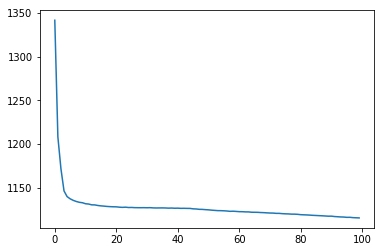

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(test.history['loss'])
temp = np.random.binomial(2,0.25,size=(500,200))

In [76]:
import numpy as np
print(temp)
models_null[0].reparameterize(*models_null[2].encode(null_data[0][2]))
len(models_null)

[[1 1 0 ... 0 1 1]
 [0 0 1 ... 0 1 1]
 [1 1 0 ... 1 0 0]
 ...
 [0 1 0 ... 2 0 0]
 [1 1 0 ... 1 0 1]
 [0 1 0 ... 1 0 0]]


12